## Finding out joint pdf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import re, seaborn as sns
from scipy import optimize
from scipy import integrate

In [2]:
df = pd.DataFrame(pd.read_csv('Dataset.csv'))

In [3]:
df

,X,Y,Z
0,10.095842,1.285000,-0.462749
1,11.316146,1.043762,0.518713
2,9.722528,-0.080484,0.397027
3,11.501689,-0.108438,-1.281233
4,10.408629,0.365171,0.234531
...,...,...,...
495,8.738167,0.562113,-0.610083
496,9.235854,0.834128,1.199135
497,9.615871,0.264039,0.381390
498,10.194426,-0.811572,-0.687542


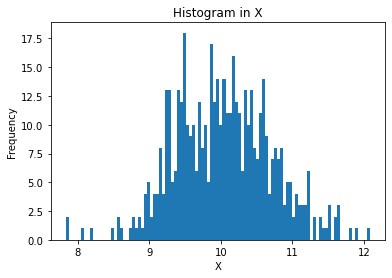

In [4]:
fig, ax = plt.subplots()
x_counts, bins, bars = ax.hist(df['X'], bins=101);
ax.set_title('Histogram in X')
ax.set_xlabel('X')
ax.set_ylabel('Frequency');

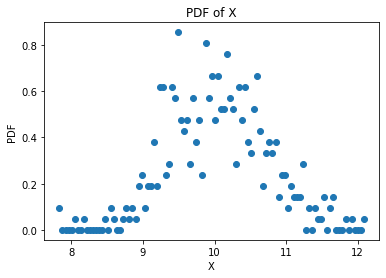

In [5]:
x_prob_arr = x_counts/len(df['X'])
x_pdf = x_prob_arr/(bins[1]-bins[0])
x_data = np.linspace(bins[0],bins[len(bins)-1], len(bins)-1)
fig, ax = plt.subplots()
ax.set_title('PDF of X')
ax.set_xlabel('X')
ax.set_ylabel('PDF')
ax.scatter(x_data, x_pdf);

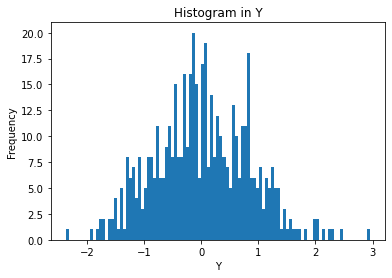

In [6]:
fig, ax = plt.subplots()
y_counts, bins, bars = ax.hist(df['Y'], bins=101);
ax.set_title('Histogram in Y')
ax.set_xlabel('Y')
ax.set_ylabel('Frequency');

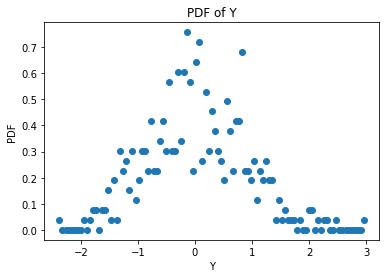

In [7]:
y_prob_arr = y_counts/len(df['Y'])
y_pdf = y_prob_arr/(bins[1]-bins[0])
y_data = np.linspace(bins[0],bins[len(bins)-1], len(bins)-1)
fig, ax = plt.subplots()
ax.set_title('PDF of Y')
ax.set_xlabel('Y')
ax.set_ylabel('PDF')
ax.scatter(y_data, y_pdf);

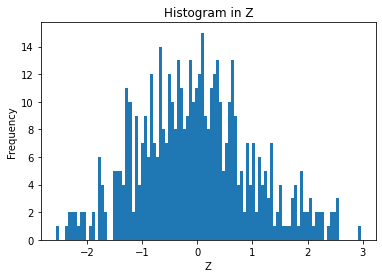

In [8]:
fig, ax = plt.subplots()
z_counts, bins, bars = ax.hist(df['Z'], bins=101);
ax.set_title('Histogram in Z')
ax.set_xlabel('Z')
ax.set_ylabel('Frequency');

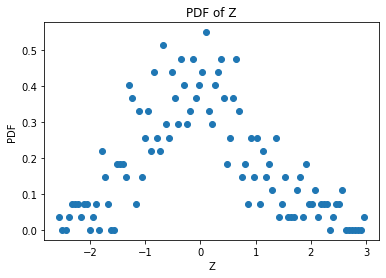

In [9]:
z_prob_arr = z_counts/len(df['Z'])
z_pdf = z_prob_arr/(bins[1]-bins[0])
z_data = np.linspace(bins[0],bins[len(bins)-1], len(bins)-1)
fig, ax = plt.subplots()
ax.set_title('PDF of Z')
ax.set_xlabel('Z')
ax.set_ylabel('PDF');
ax.scatter(z_data, z_pdf);

In [10]:
H, edges = np.histogramdd([df['X'], df['Y'], df['Z']], bins=(5,5,5))
H_prob = H/500
H_pdf = H_prob/((edges[0][1]-edges[0][0])**3)
edges
x = edges[0][1:]
y = edges[1][1:]
z = edges[2][1:]
coordinate_permutation = []
for a in range(0,5):
    for b in range(0, 5):
        for c in range(0, 5):
            coordinate_permutation.append([x[a],y[b],z[c]])
pdf_arr = []
for a in range(0,5):
    for b in range(0, 5):
        for c in range(0, 5):
            pdf_arr.append(H_pdf[a][b][c])
coordinate_permutation
df_new = pd.DataFrame(coordinate_permutation, columns=['X','Y','Z'])
df_new['pdf']= pd.Series(pdf_arr)

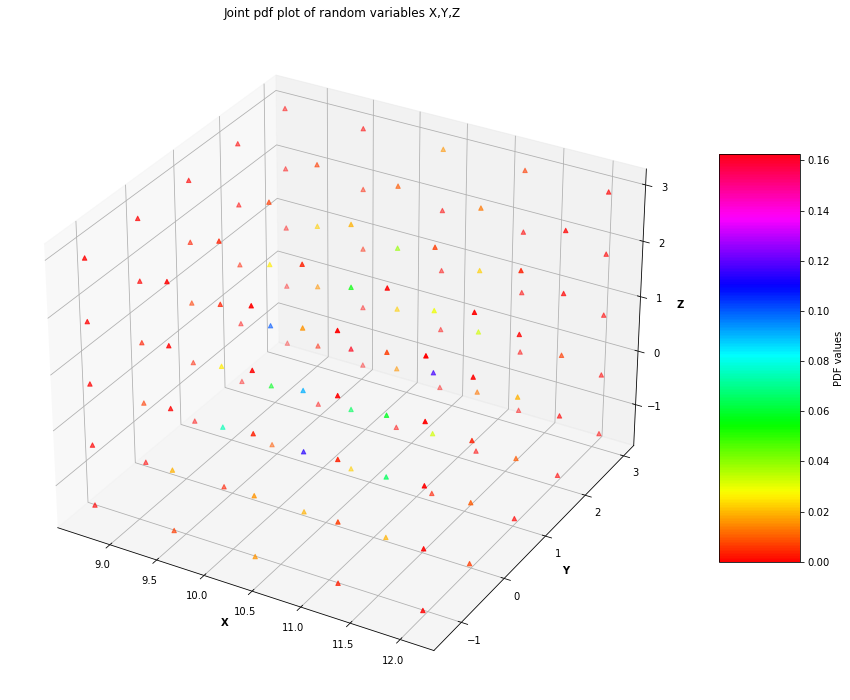

In [11]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter3D(df_new['X'],df_new['Y'], df_new['Z'], c=df_new['pdf'], cmap=my_cmap, marker='^');
 
plt.title("Joint pdf plot of random variables X,Y,Z")
ax.set_xlabel('X', fontweight ='bold')
ax.set_ylabel('Y', fontweight ='bold')
ax.set_zlabel('Z', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5, label="PDF values")

# show plot
plt.show()

## Calculating marginal probability from joint pdf

### fxy is obtained by integrating out z

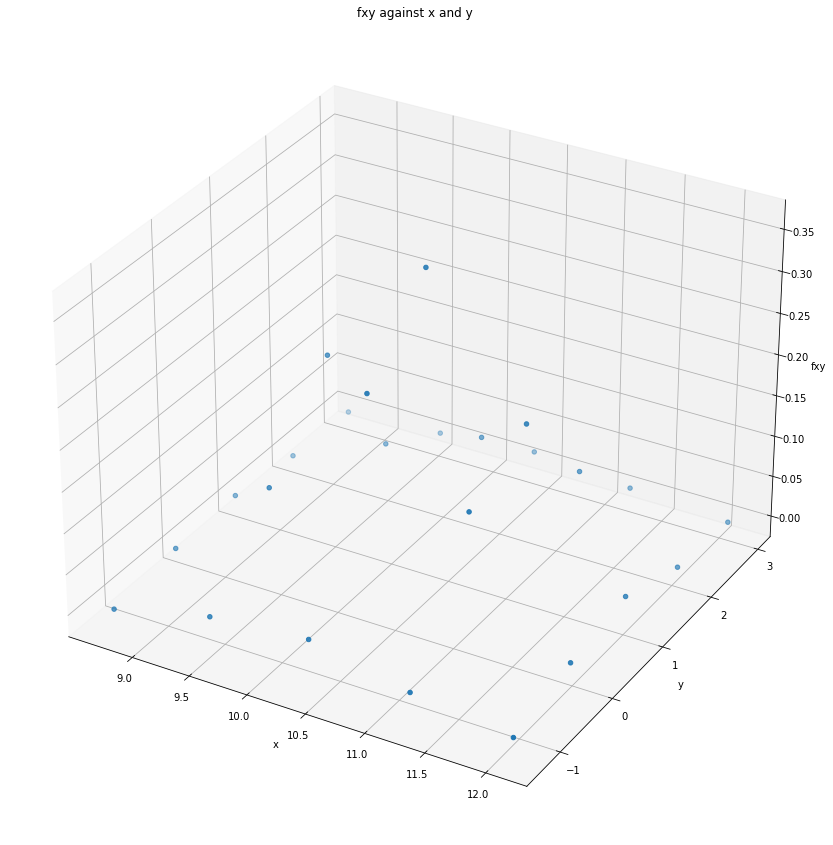

In [12]:
diff = edges[2][2] - edges[2][1]
f_xy = []
x = []
y = []
for i in range(1, 6):
    for j in range(1, 6):
        sum_total = 0
        x.append(edges[0][i])
        y.append(edges[1][j])
        a = list(df_new['pdf'][(df_new['X']==edges[0][i]) & (df_new['Y']==edges[1][j])])
        for t in range(0, len(a)):
            sum_total += (a[t]*diff)
        f_xy.append(sum_total)

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, f_xy);
data = {"X":x, "Y":y, "fxy":f_xy}
df_xy = pd.DataFrame(data)
ax.set_title('fxy against x and y')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('fxy');

### fyz is obtained by integrating out x

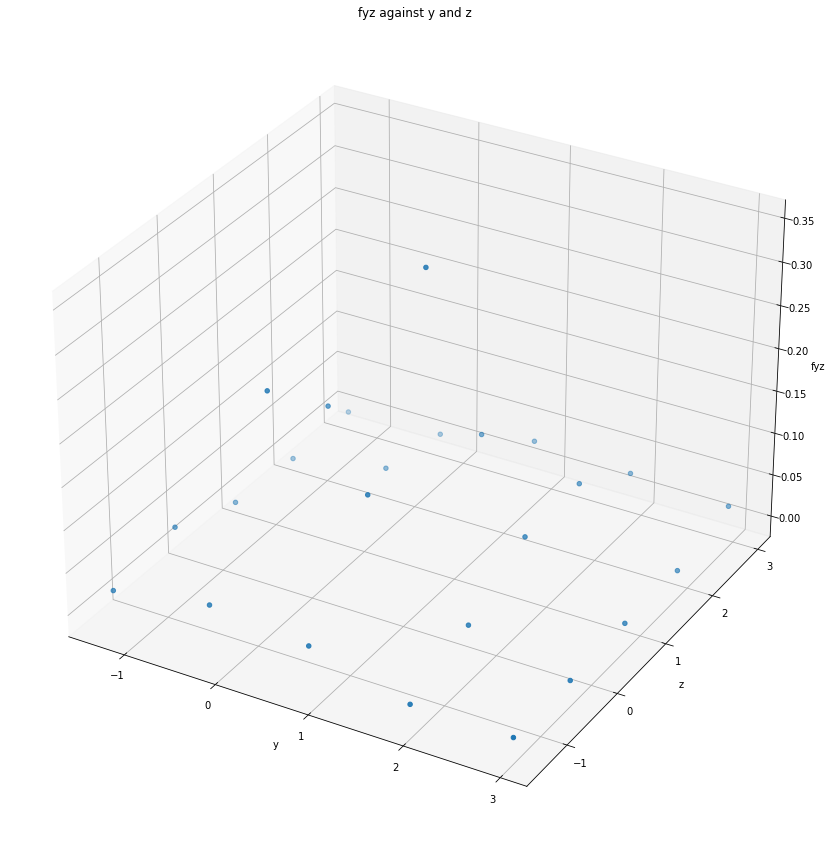

In [13]:
diff = edges[0][2] - edges[0][1]
f_yz = []
y = []
z = []
for i in range(1, 6):
    for j in range(1, 6):
        sum_total = 0
        y.append(edges[1][i])
        z.append(edges[2][j])
        a = list(df_new['pdf'][(df_new['Y']==edges[1][i]) & (df_new['Z']==edges[2][j])])
        for t in range(0, len(a)):
            sum_total += (a[t]*diff)
        f_yz.append(sum_total)

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(y, z, f_yz);
data = {"Y":y, "Z":z, "fyz":f_yz}
df_yz = pd.DataFrame(data)
ax.set_title('fyz against y and z')
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_zlabel('fyz');

### fxz is obtained by integrating out y

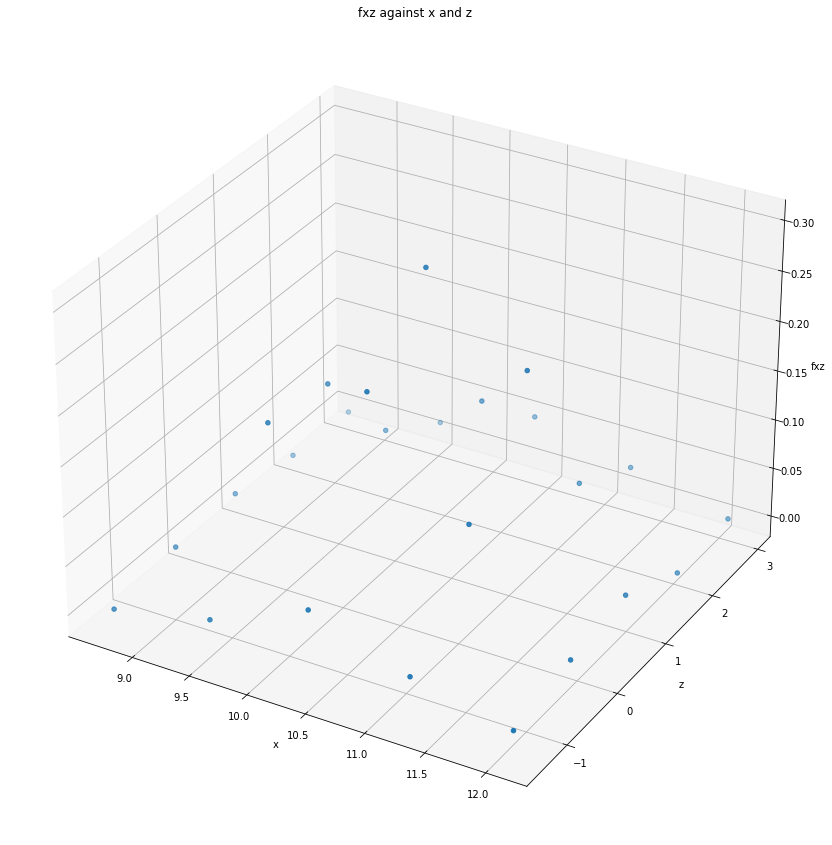

In [14]:
diff = edges[1][2] - edges[1][1]
f_xz = []
x = []
z = []
for i in range(1, 6):
    for j in range(1, 6):
        sum_total = 0
        x.append(edges[0][i])
        z.append(edges[2][j])
        a = list(df_new['pdf'][(df_new['X']==edges[0][i]) & (df_new['Z']==edges[2][j])])
        for t in range(0, len(a)):
            sum_total += (a[t]*diff)
        f_xz.append(sum_total)

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(x, z, f_xz);
data = {"X":x, "Z":z, "fxz":f_xz}
df_xz = pd.DataFrame(data)
ax.set_title('fxz against x and z')
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('fxz');

### fx is obtained by integrating y and z out

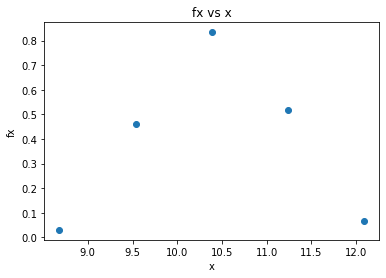

In [15]:
diff = edges[1][2] - edges[1][1]
f_x = []
x = []
for i in range(1, 6):
    sum_total = 0
    x.append(edges[0][i])
    a = list(df_xy['fxy'][(df_xy['X']==edges[0][i])])
    for t in range(0, len(a)):
        sum_total += (a[t]*diff)
    f_x.append(sum_total)

fig, ax = plt.subplots()
ax.scatter(x, f_x);
data = {"X":x, "fx":f_x}
df_x = pd.DataFrame(data)
ax.set_title('fx vs x')
ax.set_xlabel('x')
ax.set_ylabel('fx');

### fy is obtaied by integrating out x and z

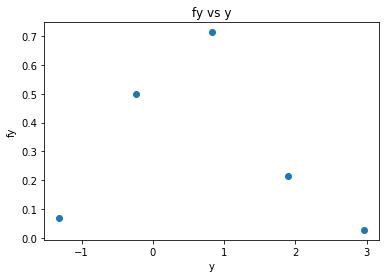

In [16]:
diff = edges[0][2] - edges[0][1]
f_y = []
y = []
for i in range(1, 6):
    sum_total = 0
    y.append(edges[1][i])
    a = list(df_xy['fxy'][(df_xy['Y']==edges[1][i])])
    for t in range(0, len(a)):
        sum_total += (a[t]*diff)
    f_y.append(sum_total)

fig, ax = plt.subplots()
ax.scatter(y, f_y);
data = {"Y":y, "fy":f_y}
df_y = pd.DataFrame(data)
ax.set_title('fy vs y')
ax.set_xlabel('y')
ax.set_ylabel('fy');

### fz is obtained b integrating x and y out

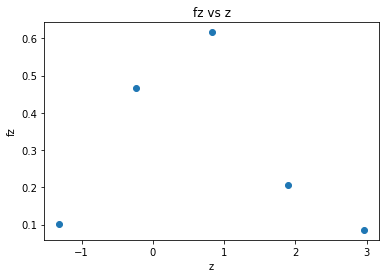

In [17]:
diff = edges[0][2] - edges[0][1]
f_z = []
z = []
for i in range(1, 6):
    sum_total = 0
    z.append(edges[1][i])
    a = list(df_xz['fxz'][(df_xz['Z']==edges[2][i])])
    for t in range(0, len(a)):
        sum_total += (a[t]*diff)
    f_z.append(sum_total)

fig, ax = plt.subplots()
ax.scatter(z, f_z);
data = {"Z":z, "fz":f_z}
df_z = pd.DataFrame(data)
ax.set_title('fz vs z')
ax.set_xlabel('z')
ax.set_ylabel('fz');

## Calculating marginal probability from data

### fx

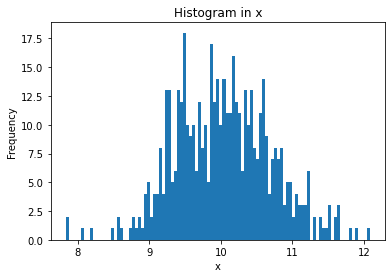

In [18]:
fig, ax = plt.subplots()
x_counts, bins, bars = ax.hist(df['X'], bins=101);
ax.set_title('Histogram in x')
ax.set_xlabel('x')
ax.set_ylabel('Frequency');

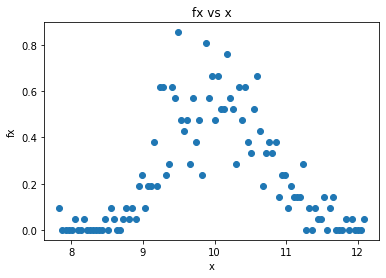

In [19]:
x_prob_arr = x_counts/len(df['X'])
x_pdf = x_prob_arr/(bins[1]-bins[0])
x_data = np.linspace(bins[0],bins[len(bins)-1], len(bins)-1)
fig, ax = plt.subplots()
ax.set_title('fx vs x')
ax.set_xlabel('x')
ax.set_ylabel('fx');
ax.scatter(x_data, x_pdf);

### fy

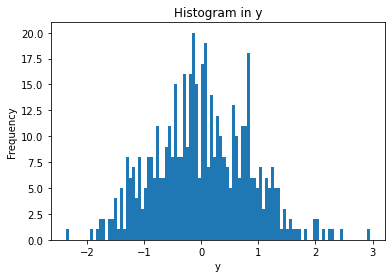

In [20]:
fig, ax = plt.subplots()
y_counts, bins, bars = ax.hist(df['Y'], bins=101);
ax.set_title('Histogram in y')
ax.set_xlabel('y')
ax.set_ylabel('Frequency');

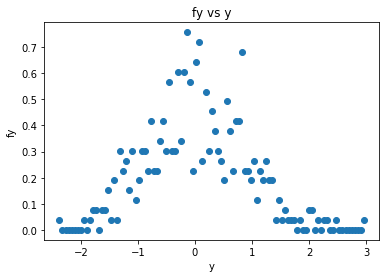

In [21]:
y_prob_arr = y_counts/len(df['Y'])
y_pdf = y_prob_arr/(bins[1]-bins[0])
y_data = np.linspace(bins[0],bins[len(bins)-1], len(bins)-1)
fig, ax = plt.subplots()
ax.set_title('fy vs y')
ax.set_xlabel('y')
ax.set_ylabel('fy');
ax.scatter(y_data, y_pdf);

### fz

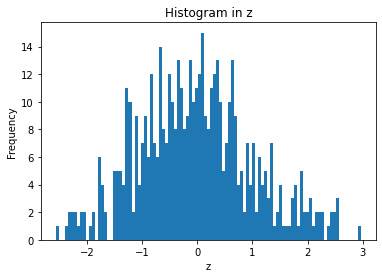

In [22]:
fig, ax = plt.subplots()
z_counts, bins, bars = ax.hist(df['Z'], bins=101);
ax.set_title('Histogram in z')
ax.set_xlabel('z')
ax.set_ylabel('Frequency');

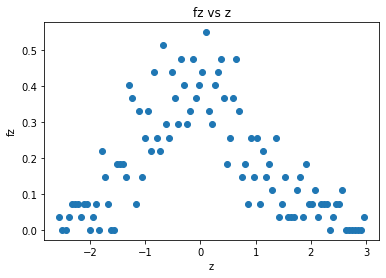

In [23]:
z_prob_arr = z_counts/len(df['Z'])
z_pdf = z_prob_arr/(bins[1]-bins[0])
z_data = np.linspace(bins[0],bins[len(bins)-1], len(bins)-1)
fig, ax = plt.subplots()
ax.set_title('fz vs z')
ax.set_xlabel('z')
ax.set_ylabel('fz');
ax.scatter(z_data, z_pdf);

### fxy

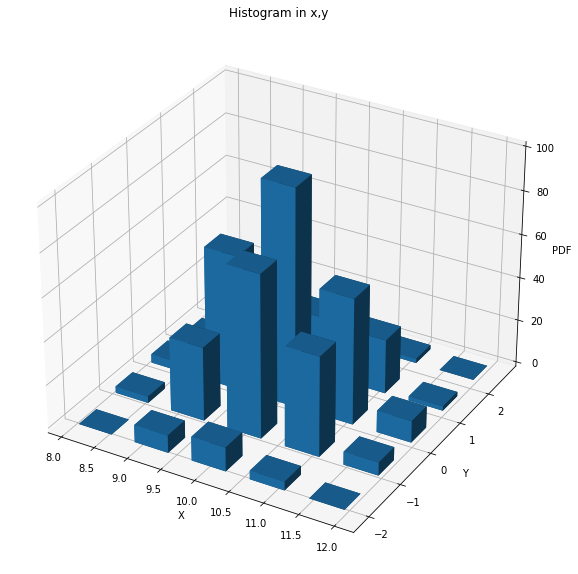

array([[0.        , 0.00660953, 0.00881271, 0.00220318, 0.        ],
       [0.01762541, 0.07490799, 0.13659693, 0.03304764, 0.00440635],
       [0.02423494, 0.16523822, 0.22031763, 0.05948576, 0.01101588],
       [0.00881271, 0.10134611, 0.12778422, 0.05507941, 0.00440635],
       [0.        , 0.01321906, 0.02203176, 0.00440635, 0.        ]])

In [3]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

hist, xedges, yedges = np.histogram2d(df['X'], df['Y'], bins=5)

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.set_title('Histogram in x,y')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF')
plt.show()
hist_prob = hist/500
hist_pdf = hist_prob/((xedges[1]-xedges[0])*(yedges[1]-yedges[0]))
hist_pdf

### fyz

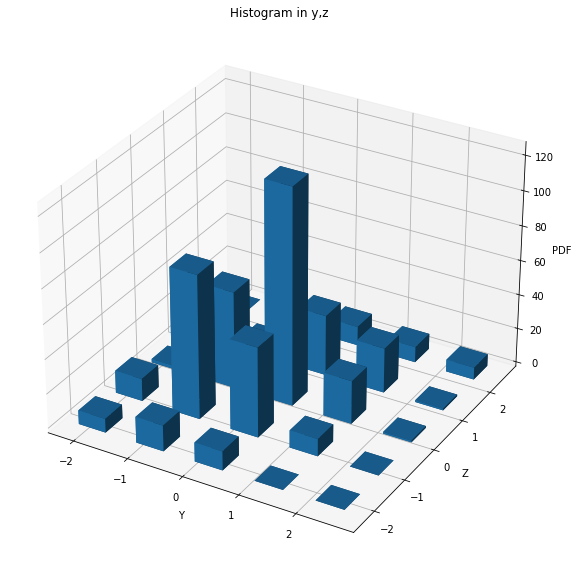

array([[0.01359514, 0.0220921 , 0.00339879, 0.        , 0.        ],
       [0.02549089, 0.14104959, 0.09516599, 0.01359514, 0.00339879],
       [0.01869332, 0.08836842, 0.21242408, 0.05947874, 0.01869332],
       [0.        , 0.01699393, 0.04248482, 0.04418421, 0.01529453],
       [0.        , 0.        , 0.00169939, 0.00169939, 0.01189575]])

In [25]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

hist, xedges, yedges = np.histogram2d(df['Y'], df['Z'], bins=5)

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.set_title('Histogram in y,z')
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_zlabel('PDF')
plt.show()
hist_prob = hist/500
hist_pdf = hist_prob/((xedges[1]-xedges[0])*(yedges[1]-yedges[0]))
hist_pdf

### fxz

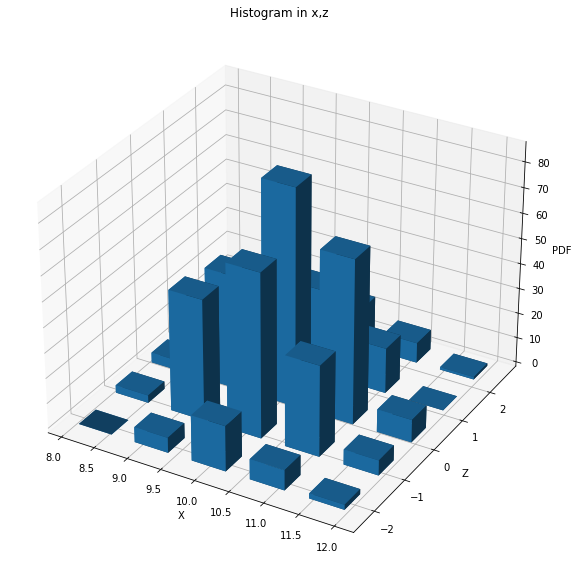

array([[0.        , 0.00639585, 0.00852779, 0.00213195, 0.        ],
       [0.01279169, 0.10233353, 0.09593768, 0.03624312, 0.01065974],
       [0.03837507, 0.13857665, 0.18334757, 0.07248625, 0.03197923],
       [0.01705559, 0.07675015, 0.13857665, 0.03837507, 0.01705559],
       [0.0042639 , 0.01279169, 0.01918754, 0.        , 0.00213195]])

In [26]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

hist, xedges, yedges = np.histogram2d(df['X'], df['Z'], bins=5)

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.set_title('Histogram in x,z')
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('PDF')
plt.show()
hist_prob = hist/500
hist_pdf = hist_prob/((xedges[1]-xedges[0])*(yedges[1]-yedges[0]))
hist_pdf

### E[X] 

In [27]:
E_X = df['X'].sum()/len(df['X'])
E_X

10.032763685758447

### E[Y]

In [28]:
E_Y = df['Y'].sum()/len(df['Y'])
E_Y

0.01752639400059599

### E[Z]

In [29]:
E_Z = df['Z'].sum()/len(df['Z'])
E_Z

-0.028856274150959163

### E[X|Y]

In [30]:
y = list(df["Y"])
e_x_y = []
for i in range(0, len(y)):
    x_values = df["X"][df["Y"] == y[i]]
    e_x_y.append(x_values.sum()/len(x_values))
data = {"Y":y, "E[X|Y]":e_x_y}
pd.DataFrame(data)

,Y,E[X|Y]
0,1.285000,10.095842
1,1.043762,11.316146
2,-0.080484,9.722528
3,-0.108438,11.501689
4,0.365171,10.408629
...,...,...
495,0.562113,8.738167
496,0.834128,9.235854
497,0.264039,9.615871
498,-0.811572,10.194426


### E[X|Z]

In [31]:
z = list(df["Z"])
e_x_z = []
for i in range(0, len(z)):
    x_values = df["X"][df["Z"] == z[i]]
    e_x_z.append(x_values.sum()/len(x_values))
data = {"Z":y, "E[X|Z]":e_x_z}
pd.DataFrame(data)

,Z,E[X|Z]
0,1.285000,10.095842
1,1.043762,11.316146
2,-0.080484,9.722528
3,-0.108438,11.501689
4,0.365171,10.408629
...,...,...
495,0.562113,8.738167
496,0.834128,9.235854
497,0.264039,9.615871
498,-0.811572,10.194426


### E[X| YZ]

In [32]:
yz = []
for i in range(0, 500):
    yz.append(df["Y"][i]*df["Z"][i])
yz_unique = list(np.unique(yz))
e_x_yz = []
for i in range(0, len(yz)):
    x_values = df["X"][df["Y"]*df["Z"] == yz[i]]
    e_x_yz.append(x_values.sum()/len(x_values))
data = {"YZ":yz_unique, "E[X|YZ]":e_x_yz}
pd.DataFrame(data)

,YZ,E[X|YZ]
0,-2.365229,10.095842
1,-1.534290,11.316146
2,-1.403218,9.722528
3,-1.217552,11.501689
4,-1.030145,10.408629
...,...,...
495,5.123032,8.738167
496,5.748615,9.235854
497,5.886661,9.615871
498,6.075954,10.194426


## Exercise-3

### Positive covariance

In [33]:
no_of_hours_practiced = [3,5,6,7,8]
marks_scored = [70,72,80,90,95]
xy = []
for i in range(0, 5):
    xy.append(no_of_hours_practiced[i]*marks_scored[i])
mean_x = sum(no_of_hours_practiced)/5
mean_y = sum(marks_scored)/5
mean_z = sum(xy)/5
covariance = mean_z - (mean_x*mean_y)
covariance

15.879999999999995

### Negative covariance

In [34]:
no_of_hours_wasted = [3,5,6,7,8]
marks_scored = [70,60,55,45,40]
xy = []
for i in range(0, 5):
    xy.append(no_of_hours_practiced[i]*marks_scored[i])
mean_x = sum(no_of_hours_wasted)/5
mean_y = sum(marks_scored)/5
mean_z = sum(xy)/5
covariance = mean_z - (mean_x*mean_y)
covariance

-18.19999999999999

### Uncorrelated and independent

In [35]:
roll_of_dice = [1,2,3,4,5,6]
toss_of_coin = [0, 1]
xy = []
for a in roll_of_dice:
    for b in toss_of_coin:
        xy.append(a*b)
mean_x = sum(roll_of_dice)/len(roll_of_dice)
mean_y = sum(toss_of_coin)/len(toss_of_coin)
mean_z = sum(xy)/len(xy)
covariance = mean_z - (mean_x*mean_y)
covariance

0.0

### Uncorrelated and not independent

In [36]:
# z = -2-(3*u)
u = [-1,0,1]
z = [1,-2,1]
xy = []
for a in u:
    for b in z:
        xy.append(a*b)
mean_x = sum(u)/len(u)
mean_y = sum(z)/len(z)
mean_z = sum(xy)/len(xy)
covariance = mean_z - (mean_x*mean_y)
covariance

0.0

- For X and Y to be positive correlated, as random variable x increases, random variable y increases. For X and Y to be negatively correlated, as X increases, Y decreases.
- If X and Y are independent, their covariance is 0, hence I choose the outcome of dice and outcome of coin toss as independent random variables.
- For finding X and Y such that their covariance is 0 but they are not independent, I took X and Y to be part of a straight line such that product of coordinates of X and Y is always 0 and mean of X is 0 and mean of Y is 0.